In [113]:
import networkx as nx
import pandas as pd
import tqdm
from collections import Counter
import json
import netwulf as nu
import matplotlib.pyplot as plt

#### Helper Functions

In [179]:
# Function to convert comma-separated strings to list and flatten
def aggregate_features(x):
    # Split each string by comma, flatten the list, and remove duplicates
    flat_list = [item.strip() for sublist in x for item in sublist.split(',')]
    return list(flat_list)


pop_acronyms = ['pop']	
rock_acronyms = ['rock', 'metal', 'punk', 'grunge']
hip_hop_acronyms = ['hip hop', 'rap', 'trap']
rnb_acronyms = ['r&b', 'jazz', 'blues', 'funk', 'lounge', 'soul']
country_acronyms = ['country']
indie_acronyms = ['indie']
electronic_acronyms = ['electronic','electro', 'edm', 'house', 'techno', 'dubstep', 'basshall', 'bass']
latin_acronyms = ['latino', 'corrido', 'latin', 'banda', 'ranchera', 'mariachi', 'cantautor', 'arrocha', 'sertanejo', 'vallenato'] # cantautor should maybe be added to rock and pop
raggae_acronyms = ['reggaeton', 'reggae']
hindi_acronyms = ['bollywood', 'filmi']
hollywood_acronyms = ['hollywood', 'soundtrack', 'movie tunes']

def rename_genres(original_genre_name):
    new_genre_name = []
    if type(original_genre_name) != str:
        original_genre_name = str(original_genre_name)
    if any(x in original_genre_name for x in pop_acronyms):
        new_genre_name.append('pop')
    if any(x in original_genre_name for x in rock_acronyms):
        new_genre_name.append('rock')
    if any(x in original_genre_name for x in hip_hop_acronyms):
        new_genre_name.append('hip hop')
    if any(x in original_genre_name for x in rnb_acronyms):
        new_genre_name.append('r&b')
    if any(x in original_genre_name for x in electronic_acronyms):
        new_genre_name.append('electronic')
    if any(x in original_genre_name for x in country_acronyms):
        new_genre_name.append('country')
    if any(x in original_genre_name for x in indie_acronyms):
        new_genre_name.append('indie')
    if any(x in original_genre_name for x in latin_acronyms):
        new_genre_name.append('latin')
    if any(x in original_genre_name for x in raggae_acronyms):
        new_genre_name.append('raggae')
    if any(x in original_genre_name for x in hindi_acronyms):
        new_genre_name.append('hindi/bollywood')
    if any(x in original_genre_name for x in hollywood_acronyms):
        new_genre_name.append('hollywood')
    if original_genre_name == "[]":
        new_genre_name.append('undefined')
    if not new_genre_name:
        new_genre_name.append('other')
    return new_genre_name

def visualize(G):
    a, b = nu.visualize(G)
    return a, b



## Gather Nodes for the network

### Rename Genres

In [180]:
df = pd.read_csv('Final_Songs_with_Artists_and_Features.csv')

df['Genres'] = df['Genres'].apply(rename_genres) # Split genres by comma

print(df.head)

<bound method NDFrame.head of                                       Song Name Main Artist  \
0                                     One Dance       drake   
1       Rich Baby Daddy (feat. Sexyy Red & SZA)       drake   
2                            IDGAF (feat. Yeat)       drake   
3        act ii: date @ 8 (feat. Drake) - remix       drake   
4          First Person Shooter (feat. J. Cole)       drake   
...                                         ...         ...   
132035                            Bam Bam Bhole  kartik dev   
132036          Pyaar Ch Haan (From "Furteela")  kartik dev   
132037            Main Kamla (From " Furteela")  kartik dev   
132038                          Satnam Waheguru  kartik dev   
132039                               Tu Aaja Na  kartik dev   

                             Featured Artists          Genres  Popularity  \
0                                Wizkid, Kyla  [pop, hip hop]          95   
1                              Sexyy Red, SZA  [pop, hip ho

In [181]:
df_artists =  df.drop_duplicates(subset='Main Artist') #Only interested in one node per artist

### Assign color mapping to combination of genres

In [182]:
genres_list  = [row['Genres'] for index, row in df_artists.iterrows()]

# Using a Counter to count occurrences of each unique combination
# We convert the internal lists to tuples because lists cannot be hashed and used as dictionary keys
genre_combinations = Counter(tuple(genre) for genre in genres_list)

# Display the count of each unique combination
genre_combinations = genre_combinations.most_common()

# for genres, count in genre_combinations:
#     print(f"{' & '.join(genres)}: {count}")

color_mapping = {
    'red': '#FF0000',
    'green': '#008000',
    'blue': '#0000FF',
    'yellow': '#FFFF00',
    'purple': '#800080',
    'orange': '#FFA500',
    'teal': '#008080',
    'lime': '#00FF00',
    'pink': '#FFC0CB',
    'grey': '#808080',
    'navy': '#000080',
    'maroon': '#800000',
    'olive': '#808000',
    'magenta': '#FF00FF',
    'tan': '#D2B48C',
    'cyan': '#00FFFF',
    'violet': '#EE82EE',
    'coral': '#FF7F50',
    'khaki': '#F0E68C',
    'lavender': '#E6E6FA',
    'silver': '#C0C0C0',
    'peach': '#FFEFD5',
    'bronze': '#CD7F32',
    'plum': '#DDA0DD',
    'gold': '#FFD700',
    'ivory': '#FFFFF0',
    'beige': '#F5F5DC',
    'mustard': '#FFDB58',
    'turquoise': '#40E0D0',
    'mint': '#98FF98',
    'saffron': '#F4C430',
    'fuchsia': '#FF00FF',
    'cinnamon': '#D2691E',
    'chartreuse': '#7FFF00',
    'azure': '#F0FFFF',
    'indigo': '#4B0082',
    'periwinkle': '#CCCCFF',
    'sand': '#C2B280',
    'clay': '#B66D28',
    'honeydew': '#F0FFF0',
    'flamingo': '#FC8EAC',
    'lemon': '#FFFACD',
    'raspberry': '#E30B5D',
    'forest green': '#228B22',
    'auburn': '#A52A2A',
    'midnight blue': '#191970',
    'cream': '#FFFDD0',
    'amber': '#FFBF00',
    'emerald': '#50C878',
    'sapphire': '#0F52BA',
    'cerulean': '#007BA7',
    'charcoal': '#36454F',
    'ruby': '#E0115F',
    'slate': '#708090',
    'orchid': '#DA70D6',
    'crimson': '#DC143C',
    'cobalt': '#0047AB',
    'ocean blue': '#4F42B5',
    'firebrick': '#B22222',
    'moss green': '#8A9A5B',
    'jade': '#00A86B',
    'eggplant': '#614051',
    'copper': '#B87333',
    'cherry': '#DE3163',
    'sepia': '#704214',
    'citrine': '#E4D00A',
    'gunmetal': '#2a3439',
    'pistachio': '#93C572',
    'salmon': '#FA8072',
    'caramel': '#FFD59A',
    'taupe': '#483C32',
    'electric blue': '#7DF9FF',
    'mauve': '#E0B0FF',
    'sienna': '#882D17',
    'fern green': '#4F7942',
    'butter': '#FFF48D',
    'tangerine': '#F28500',
}
category_dict = {}
cat_tracker = 0
for genres, count in genre_combinations:
    if genres not in category_dict and count > 100:
        color = list(color_mapping.keys())[cat_tracker]
        category_dict[genres] = color_mapping[color]
        cat_tracker += 1
    if genres not in category_dict and count <= 100:
        category_dict[genres] = '#000000'
    if cat_tracker >= len(color_mapping):
        cat_tracker = 0
    


[['pop', 'hip hop'], ['pop', 'hip hop'], ['pop'], ['hip hop', 'latin', 'raggae'], ['hip hop', 'latin', 'raggae'], ['pop'], ['pop', 'hip hop', 'latin', 'raggae'], ['pop'], ['pop', 'r&b'], ['hip hop', 'latin', 'raggae']]


Create a list that has the final Combinations and Genres for the network

In [183]:
top_combinations = []
top_combinations_dict = {}
for genre, count in genre_combinations:
    if count > 200 or len(genre) == 1:
        top_combinations_dict[genre] = category_dict[genre]
        top_combinations.append(genre)

Categorize within the final list.

In [186]:
for genres, count in reversed(genre_combinations):
    if count <= 200:
        for combination in top_combinations:
            if(all(x in genres for x in combination)):
                category_dict[genres] = category_dict[combination]


### Gather attributes for nodes

In [188]:
#Add attributes for each artist
attr_list = []
for index, row in tqdm.tqdm(df_artists.iterrows(), total=df_artists.shape[0]):
    artist_attributes = {'genres': row['Genres'], 'popularity': row['Popularity'], 'followers': row['Followers'], 'size': 1, 'group' : category_dict[tuple(row['Genres'])]}
    attr_list.append((row['Main Artist'], artist_attributes))

       
    

100%|██████████| 14088/14088 [00:01<00:00, 8655.78it/s]


## Gather Edges for the network

### Drop songs that have no features and aggregate collaborations to one row

In [189]:

# drop NA values
df_artists_features = df.dropna() # Might replace some artist that haven't been featured with anyone

# Group by 'Main Artist' and aggregate 'Featured Artists' into a list
df_grouped_featured = df_artists_features.groupby('Main Artist')['Featured Artists'].agg(aggregate_features).reset_index()


def lower(list):
    return [x.lower() for x in list]

df_grouped_featured['Featured Artists'] = df_grouped_featured['Featured Artists'].apply(lower) 

# Save the result to a CSV file
df_grouped_featured.to_csv('Artists_Features.csv', index=False)

In [190]:
df_grouped_featured

,Main Artist,Featured Artists
0,!llmind,"[guapdad 4000, guapdad 4000, guapdad 4000, gua..."
1,#estudeofunk,"[larissa, mc gut original, dee-x, larissa, k&o..."
2,#tocoparavos,"[meri deal, meri deal, el reja, marka akme, me..."
3,$amuka,"[big bllakk, rock danger, juyè, beat do ávila,..."
4,$hirak,"[cristian d, km, cristian d, lil kleine, boef,..."
...,...,...
13007,馬毓芬,"[lala hsu, michael wong, eve ai, matzka, 黃子佼, ..."
13008,騒音寺,"[dohatsuten, 綾小路 翔(氣志團), うつみようこ, oi-skall mate..."
13009,高爾宣 osn,"[sophie chen, 李浩瑋 howard lee, vicky chen]"
13010,黃子佼,"[lala hsu, michael wong, eve ai, matzka, 陶晶瑩, ..."


### Get collaborations

In [191]:
collabs = []
for artist_idx in range(len(df_grouped_featured['Main Artist'])):
    features = df_grouped_featured['Featured Artists'][artist_idx]
    main_artist = df_grouped_featured['Main Artist'][artist_idx]
    collabs.extend((main_artist, feature) for feature in features if feature in df_artists_features['Main Artist'].values)


### Number of collaborations between two artists

In [192]:
#Count the number of occurences of the Collaborations
counter = Counter(collabs)
occurrences = counter.most_common()
artists_collabs = [(pair[0], pair[1], count) for pair, count in occurrences]
artists_edges = [{'source': pair[0], 'target': pair[1], 'value' : count} for pair, count in occurrences]


## Populate the network

In [193]:
#Create graph and employ the G.add_weighted_edges_from() function
G = nx.Graph()
for artist_name, attr in attr_list:
    G.add_node(artist_name, genres = attr['genres'], popularity = attr['popularity'], followers = attr['followers'], size = attr['size'], group = attr['group'])
G.add_weighted_edges_from(artists_collabs)

In [194]:
# Assuming you have a graph called G
max_degree = max(dict(nx.degree(G)).values())

print("Maximum number of degrees:", max_degree)


Maximum number of degrees: 193


### Scale size of nodes with follower count

In [195]:
# Scale size of nodes by followers
for node in G.nodes():
    G.nodes[node]['size'] = G.nodes[node]['followers']

# Scale size of nodes by popularity
# for node in G.nodes():
#     G.nodes[node]['size'] = G.nodes[node]['popularity']

In [ ]:
# nodes_to_remove = []
# for node in G.nodes():
#     if G.nodes[node]['genres'] == ['other'] :
#         nodes_to_remove.append(node)
        
# for node in nodes_to_remove:
#     G.remove_node(node)

### Plot bar for group assignments

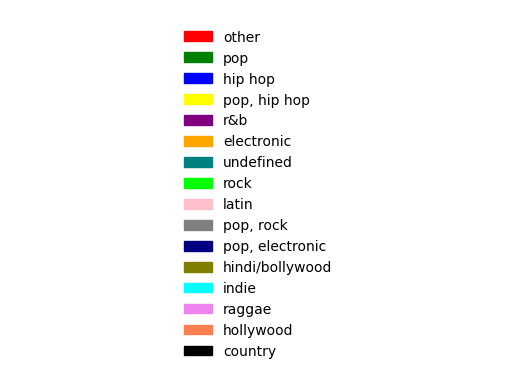

In [196]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create figure and axes
fig, ax = plt.subplots()

# Create a list of patches
patches = [mpatches.Patch(color=color, label=', '.join(genres)) for genres, color in top_combinations_dict.items()]

# Add patches to legend
legend = ax.legend(handles=patches, loc='center', frameon=False)

# Hide axes
ax.axis('off')

# Save or display the legend
plt.savefig('legend.png')  # Save the legend as a PNG file
plt.show()  # Display the legend on screen

### Export network to json

In [197]:
from networkx.readwrite import json_graph

graph_as_json = json_graph.node_link_data(G)

with open('graph2.json', 'w') as f:
    json.dump(graph_as_json, f, indent=4)

### Visualize network

In [198]:
nu.visualize(G)

(None, None)